# Linear Regression

Following code is part of an assignment for the course IMSE 586 - Big Data Analytics and Visualization at the University of Michigan at Dearborn.


### Linear regression with StatsModels

Download the `Credit.csv` file that we used during the lecture. Make sure you include this data file in your submission package. 

Read the data into a pandas dataframe. Do the normal checking on the dataframe, drop the index column ("Unnamed: 0"), and then answer the following questions.

1. Generate a heatmap based on the correlation matrix for all pairs of features. Display the correlation coefficients on the heatmap. Change the color map to something different from the default. Hint: Google `matplotlib` `colormap`. 


2. Fit a regression model to predict the credit balance using income, credit limit, and credit rating. Print the result summary table. Check the colinearity of the predictors by obtaining the variance inflation factors (VIF) for the three predictors. What conclusions can you draw based on the VIF values?


3. Continue from Q2, now remove the credit limit predictor, and add the predictor indicating whether the individual is a student. Fit this new regression model to the data. What is the estimated coefficient for the "Student" predictor? What is the interpretation of this number? 


4. Continue from Q3, now add an interaction term for Income and Rating. Is this interaction effect significant at confidence level $\alpha = 0.05$? Briefly explain.


5. Based on the model in Q4, predict the balance for someone who has an income of $85k, credit rating of 550, and is not a student. For the prediction, provide the point estimate, the 95% confidence interval, and the 95% prediction interval. Briefly describe the  difference between the two intervals. 

### Data description:

**Income**: Income in thousands of dollors

**Limit**: Credit limit

**Rating**: Credit rating

**Cards**: Number of credit cards

**Age**: Age in years

**Education**: Number of years of education

**Gender**: A factor with levels Male and Female

**Student**: A factor with levels No and Yes indicating whether the individual was a student

**Married**: A factor with levels No and Yes indicating whether the individual was married

**Ethnicity**: A factor with levels African American, Asian, and Caucasian indicating the individual's ethnicity

**Balance**: Average credit card balance in $.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
credit = pd.read_csv('data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [13]:
credit.drop(columns = ['Unnamed: 0'], inplace = True)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## 1. Generate a heatmap based on the correlation matrix for all pairs of features. Display the correlation coefficients on the heatmap. Change the color map to something different from the default. Hint: Google `matplotlib` `colormap`. 

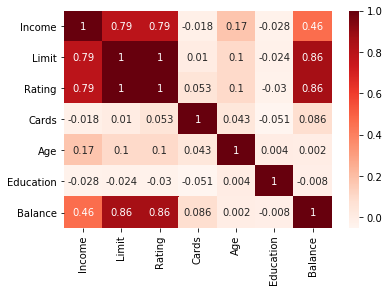

In [21]:
correl = credit.corr(method = 'pearson').round(3)
sns.heatmap(cor, cmap = plt.cm.Reds, annot = True)

## 2. Fit a regression model to predict the credit balance using income, credit limit, and credit rating. Print the result summary table. Check the colinearity of the predictors by obtaining the variance inflation factors (VIF) for the three predictors. What conclusions can you draw based on the VIF values?

In [22]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = 'Balance ~ Income + Limit + Rating' 
result = smf.ols(formula = model, data = credit).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     934.6
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          3.20e-179
Time:                        07:31:44   Log-Likelihood:                -2601.5
No. Observations:                 400   AIC:                             5211.
Df Residuals:                     396   BIC:                             5227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -489.7275     32.099    -15.257      0.0

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

matrix = credit[['Income', 'Limit', 'Rating']].assign(const = 1)
pd.Series([variance_inflation_factor(matrix.values, i) for i in range(matrix.shape[1])], index = matrix.columns)

Income      2.687461
Limit     161.193323
Rating    160.707918
const      15.635753
dtype: float64

The VIF for Limit and Rating are much bigger than 10, indicating high collinearity. We should drop one of them.

## 3. Continue from Q2, now remove the credit limit predictor, and add the predictor indicating whether the individual is a student. Fit this new regression model to the data. What is the estimated coefficient for the "Student" predictor? What is the interpretation of this number? 

In [23]:
model = 'Balance ~ Income + Rating + Student' 
result = smf.ols(formula = model, data = credit).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     2502.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          6.23e-257
Time:                        07:33:50   Log-Likelihood:                -2420.7
No. Observations:                 400   AIC:                             4849.
Df Residuals:                     396   BIC:                             4865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -581.0789     13.835    -42.

The estimated coefficient for the "Student" predictor is 418.7603. 

Since this categorical predictor is coded as 1 if the individual is a student, and 0 otherwise, the coefficient means when all else are equal, students have an esitmated $418.7603 more balance compared with non-students. 

## 4. Continue from Q3, now add an interaction term for Income and Rating. Is this interaction effect significant at confidence level $\alpha = 0.05$? Briefly explain.

In [25]:
model= 'Balance ~ Student + Income*Rating'
result = smf.ols(formula = model, data = credit).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2002.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          1.04e-260
Time:                        07:34:08   Log-Likelihood:                -2407.8
No. Observations:                 400   AIC:                             4826.
Df Residuals:                     395   BIC:                             4846.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -500.3213     20.705    -24.

The interaction term is significant as the *p*-value is less than 0.05. Or the 95% CI does not include zero. 

## 5. Based on the model in Q4, predict the balance for someone who has an income of $85k, credit rating of 550, and is not a student. For the prediction, provide the point estimate, the 95% confidence interval, and the 95% prediction interval. Briefly describe the  difference between the two intervals. 

In [27]:
limit = {'Income': [85], 'Rating': [550], 'Student': ['No']}

predict = pd.DataFrame(data = limit)

result.predict(predict)

0    923.29991
dtype: float64

In [29]:
predictions = result.get_prediction(predict)

predictions.summary_frame(alpha = .05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,923.29991,9.131921,905.346665,941.253155,725.534184,1121.065636


The point estimate of the prediction is $923.3.

The 95% confidence interval (CI) is [905.3, 941.3].

The 95% prediction interval is (PI) [725.5, 1121.1].

The CI gives an interval for the average or expected balance for someone having an income of $85k, 550 credit rating, and non student, according to our model.

The PI gives an interval for the balance of the next person that we are trying to predict who has an income of $85k, etc.